# MODELO POLINOMIAL

### AUTOR: CARLOS MOROCHO

Aplicar el modelo exponencial y polinomial al dataset actualizado de covid 19 en Ecuador, predecir el número de contagios para las fechas de 11 de noviembre y 1 de diciembre y realizar una comparativa.

In [1]:
#Importación de las librerias necesarias
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Obtención de los datos de COVID-19 de Ecuador
url_datos = 'DatosCOVID2020.csv'

datos = pd.read_csv(url_datos, sep = ',')
datos

,muestras,muestras_pcr,muestras_pcr_nuevas,pruebas_rezagadas,muertes_confirmadas,muertes_probables,muertes,muertes_nuevas,positivas,positivas_pcr,...,defunciones_2017,defunciones_2017_nuevas,defunciones_2016,defunciones_2016_nuevas,defunciones_2015,defunciones_2015_nuevas,hospitalizadas_altas,hospitalizadas_estables,hospitalizadas_pronostico_reservadas,created_at
0,129,129,0,106,1,0,1,0,23,23,...,14506,217,13643,212,12866,167,0,0,1,13/03/2020
1,206,206,77,178,2,0,2,1,28,28,...,14718,212,13848,205,13047,181,0,7,3,14/03/2020
2,273,273,67,236,2,0,2,0,37,37,...,14926,208,14048,200,13228,181,0,7,2,15/03/2020
3,354,354,81,296,2,0,2,0,58,58,...,15164,238,14238,190,13388,160,0,9,5,16/03/2020
4,762,762,408,651,2,0,2,0,111,111,...,15347,183,14412,174,13550,162,0,9,5,17/03/2020
5,762,762,0,282,3,0,3,1,168,168,...,15555,208,14644,232,13736,186,0,10,6,18/03/2020
6,1153,1153,391,481,4,0,4,1,260,260,...,15789,234,14858,214,13919,183,3,12,5,19/03/2020
7,1670,1670,517,711,7,0,7,3,426,426,...,16013,224,15064,206,14105,186,3,10,7,20/03/2020
8,2051,2051,381,870,7,0,7,0,532,532,...,16234,221,15267,203,14273,168,3,5,15,21/03/2020
9,2360,2360,309,699,14,0,14,7,789,789,...,16456,222,15450,183,14450,177,3,54,17,22/03/2020


In [3]:
#Se filtran los datos para obtener solo los casos positivos
datos_infectados = datos.loc[:, ['positivas', 'created_at']]

#Expresar los datos de fecha en número de dias desde el inicio de año
formato = '%d/%m/%Y'
fecha = datos_infectados['created_at']
datos_infectados['created_at'] = fecha.map(lambda x: 
    (datetime.strptime(x, formato) - datetime.strptime('01/01/2020', formato)).days
)

datos_infectados

,positivas,created_at
0,23,72
1,28,73
2,37,74
3,58,75
4,111,76
5,168,77
6,260,78
7,426,79
8,532,80
9,789,81


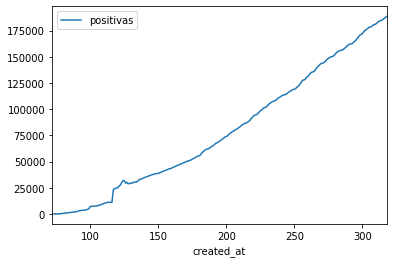

In [4]:
datos_infectados.plot(x = 'created_at', y = 'positivas')

In [5]:
#Obtención de las variables para el entrenamiento
x = list(datos_infectados.iloc[:, 1]) #Fecha (Número de día)
y = list(datos_infectados.iloc[:, 0]) #Numero de infectados

#Definición del modelo polinomial
definicion = PolynomialFeatures(degree = 4)
modelo_polinomial = LinearRegression()

#Ajuste de la entrada a la forma polinomial
X = definicion.fit_transform(np.array(x).reshape(-1, 1))

#Realizamos el ajuste de curva para los datos
modelo_polinomial.fit(X, y)

dias = 30
prediccion = modelo_polinomial.predict([X[-1] + dias])
print('Predicción de casos positivos para el 13/12/2020: ', int(prediccion))

Predicción de casos positivos para el 13/12/2020:  224133


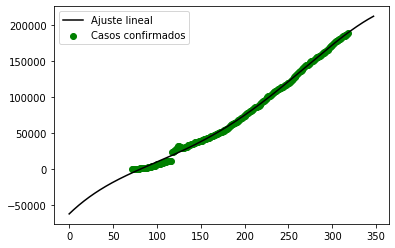

In [6]:
#Gráfica de los datos y prediccion
x_real = np.array(range(0, 348))
x_real = definicion.fit_transform(x_real.reshape(-1, 1))

plt.scatter(x, y, color = 'green')
plt.plot(modelo_polinomial.predict(x_real), color = 'black')
plt.legend(('Ajuste lineal', 'Casos confirmados'))
plt.show()

De acuerdo al modelo entrenado, el número de casos que habrá el 13/12/2020 será 224133 confirmados.

### 3) Análisis

El modelo polinomial implementado es de 4to grado y muestra un ajuste bastante adecuado para el conjunto de datos, por lo que las predicciones realizadas mediante este serán mucho más precisas.

### 4) Conclusiones

El modelo polinomial es muy útil cuando los datos presentan curvaturas, puesto que dependiendo del grado de polinomio con el que se desee trabajar, la curva ajusta reflejara un mejor comportamiento para los mismos.

### 5) Criterio personal (Político, económico y social de la situación)

Debido a todo el caos que provoco el virus en todo el mundo, estos modelos de prediccon que si bien no son del todo exactos pueden ayudarnos a solventar algunas respuestas que todo la sociedad esta buscando, existen millones de empresas que de seguro estan desarrollando estos sistemas devido a la contingencia pero creo que ningunoo veneficia a la sociedad como la informacion como tal.